In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

df = pd.read_csv("C:/Users/akash/Downloads/PYTHON/data_jobs.csv")

#clean job_posted_date and job_skills to df column
df.job_posted_date = pd.to_datetime(df.job_posted_date) 

df = df.dropna(subset= 'job_skills')
df['job_skills'] = df['job_skills'].apply(lambda skills : ast.literal_eval(skills))

<Axes: ylabel='job_schedule_type'>

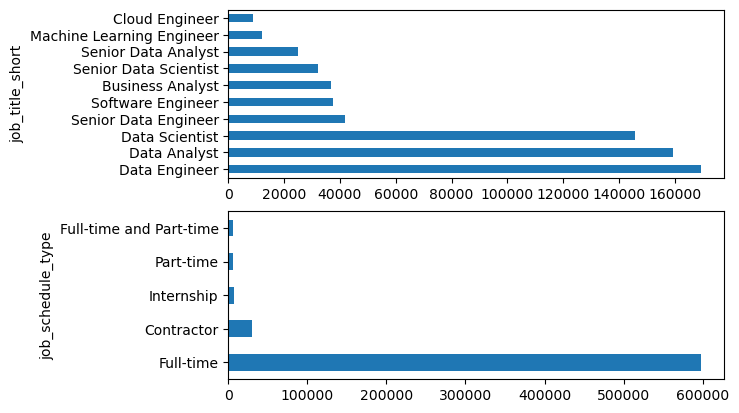

In [13]:
fig, ax = plt.subplots(2,1)

df['job_title_short'].value_counts().plot(kind='barh', ax=ax[0])
df['job_schedule_type'].value_counts().head(5).plot(kind='barh', ax=ax[1])



job_schedule_type
Full-time                  597768
Contractor                  30447
Internship                   7098
Part-time                    6157
Full-time and Part-time      5350
Name: count, dtype: int64

In [39]:
df_exp = df.explode('job_skills')

df_skill_count = df_exp.groupby(['job_skills', 'job_title_short']).size()

df_skill_count = df_skill_count.reset_index()

In [40]:
type(df_skill_count)

pandas.core.frame.DataFrame

    job_skills job_title_short     0
2      airflow    Data Analyst  2002
12    airtable    Data Analyst    88
22     alteryx    Data Analyst  4570
32     angular    Data Analyst   376
41  angular.js    Data Analyst     2
    job_skills job_title_short     0
4      airflow  Data Scientist  3915
14    airtable  Data Scientist    65
24     alteryx  Data Scientist  2068
34     angular  Data Scientist   736
43  angular.js  Data Scientist    12
    job_skills job_title_short      0
3      airflow   Data Engineer  25505
13    airtable   Data Engineer     68
23     alteryx   Data Engineer   2294
33     angular   Data Engineer   1446
42  angular.js   Data Engineer     45


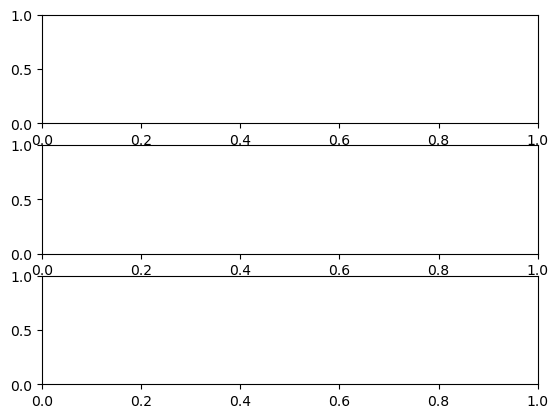

In [46]:
fig, ax = plt.subplots(3,1)

jobs = ['Data Analyst','Data Scientist', 'Data Engineer']

for i, job in enumerate(jobs):
    print(df_skill_count[df_skill_count['job_title_short'] == job].head(5))

